# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
 # !apt-get install git-lfs

 # !git clone https://github.com/1702538/VeryBasicTeam.git

 # %cd /content/VeryBasicTeam/
 # !git pull

## Loading and reading the CSV files

In [3]:
df_train = pd.read_csv("https://github.com/1702538/VeryBasicTeam/blob/main/train.csv?raw=true")
df_test = pd.read_csv('https://github.com/1702538/VeryBasicTeam/blob/main/test.csv?raw=true')
df_pairs = pd.read_csv("https://github.com/1702538/VeryBasicTeam/blob/main/pairs.csv?raw=true")
df_sample_submission = pd.read_csv('https://github.com/1702538/VeryBasicTeam/blob/main/sample_submission.csv?raw=true')

## Quick glance into the data and it's headers

In [4]:
df_train.head()

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb


In [5]:
df_test.head()

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories
0,E_00001118ad0191,Jamu Petani Bagan Serai,5.012169,100.535805,NaN,NaN,NaN,NaN,MY,NaN,NaN,Cafés
1,E_000020eb6fed40,Johnny's Bar,40.434209,-80.564160,497 N 12th St,Weirton,WV,26062.0,US,NaN,NaN,Bars
2,E_00002f98667edf,QIWI,47.215134,39.686088,"Межевая улица, 60",Ростов-на-Дону,NaN,NaN,RU,https://qiwi.com,7.800301e+10,ATMs
3,E_001b6bad66eb98,"Gelora Sriwijaya, Jaka Baring Sport City",-3.014675,104.794374,NaN,NaN,NaN,NaN,ID,NaN,NaN,Stadiums
4,E_0283d9f61e569d,Stadion Gelora Sriwijaya,-3.021727,104.788628,Jalan Gubernur Hasan Bastari,Palembang,South Sumatra,11480.0,ID,NaN,NaN,Soccer Stadiums


In [6]:
df_pairs.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


In [7]:
df_sample_submission.head()

,id,matches
0,E_00001118ad0191,E_00001118ad0191
1,E_000020eb6fed40,E_000020eb6fed40
2,E_00002f98667edf,E_00002f98667edf
3,E_001b6bad66eb98,E_001b6bad66eb98 E_0283d9f61e569d
4,E_0283d9f61e569d,E_0283d9f61e569d E_001b6bad66eb98


## Summary of data dimensions

In [8]:
print("train.csv", df_train.shape)
print("test.csv", df_test.shape)
print("pairs.csv", df_pairs.shape)
print("sample_submission.csv", df_sample_submission.shape)

train.csv (1138812, 13)
test.csv (5, 12)
pairs.csv (578907, 25)
sample_submission.csv (5, 2)


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138812 entries, 0 to 1138811
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1138812 non-null  object 
 1   name               1138811 non-null  object 
 2   latitude           1138812 non-null  float64
 3   longitude          1138812 non-null  float64
 4   address            742191 non-null   object 
 5   city               839623 non-null   object 
 6   state              718226 non-null   object 
 7   zip                543386 non-null   object 
 8   country            1138801 non-null  object 
 9   url                267724 non-null   object 
 10  phone              342855 non-null   object 
 11  categories         1040505 non-null  object 
 12  point_of_interest  1138812 non-null  object 
dtypes: float64(2), object(11)
memory usage: 112.9+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5 non-null      object 
 1   name        5 non-null      object 
 2   latitude    5 non-null      float64
 3   longitude   5 non-null      float64
 4   address     3 non-null      object 
 5   city        3 non-null      object 
 6   state       2 non-null      object 
 7   zip         2 non-null      float64
 8   country     5 non-null      object 
 9   url         1 non-null      object 
 10  phone       1 non-null      float64
 11  categories  5 non-null      object 
dtypes: float64(4), object(8)
memory usage: 608.0+ bytes


In [11]:
df_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578907 entries, 0 to 578906
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_1          578907 non-null  object 
 1   name_1        578907 non-null  object 
 2   latitude_1    578907 non-null  float64
 3   longitude_1   578907 non-null  float64
 4   address_1     475383 non-null  object 
 5   city_1        512928 non-null  object 
 6   state_1       452316 non-null  object 
 7   zip_1         359509 non-null  object 
 8   country_1     578899 non-null  object 
 9   url_1         231806 non-null  object 
 10  phone_1       270022 non-null  object 
 11  categories_1  562613 non-null  object 
 12  id_2          578907 non-null  object 
 13  name_2        578907 non-null  object 
 14  latitude_2    578907 non-null  float64
 15  longitude_2   578907 non-null  float64
 16  address_2     312497 non-null  object 
 17  city_2        367490 non-null  object 
 18  stat

# Useful information for match is as follows:
### id_1, latitude_1, longitude_1
### id_2, latitude_2, longitude_2
### match

In [12]:
df_pairs.head()
my_df_pairs = df_pairs[["id_1", "latitude_1", "longitude_1", "id_2", "latitude_2", "longitude_2", "match"]]
my_df_pairs.head()

,id_1,latitude_1,longitude_1,id_2,latitude_2,longitude_2,match
0,E_000001272c6c5d,50.859975,3.634196,E_da7fa3963561f8,50.869358,3.635206,True
1,E_000008a8ba4f48,37.844510,27.844202,E_3f12df0b045062,37.838020,27.845560,False
2,E_000023d8f4be44,14.518970,121.018702,E_12453effe251db,14.518330,121.019827,True
3,E_00007dcd2bb53f,38.257797,-122.064599,E_f131dcb7f07be9,38.257938,-122.064606,True
4,E_0000c362229d93,7.082218,125.610244,E_d52c3c4d53831c,7.076016,125.611457,False


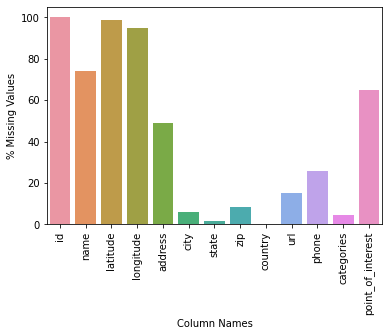

In [13]:
# ZhengYu
sama = (df_train.nunique()/df_train.shape[0]*100).to_frame().reset_index().rename(columns = {'index':'column', 0:'pct_unique'})
fig, ax = plt.subplots()
ax = sns.barplot(data = sama, x = 'column', y = 'pct_unique')
ax.set_ylabel('% Missing Values')
ax.set_xlabel('Column Names')
plt.xticks(rotation = 90)
plt.show()


In [14]:
# #Claudia
# category_stats=df_train['categories'].value_counts()*100/df_train['categories'].value_counts().sum()
# category_stats.head(10)

# plt.figure(figsize=(8,7))
# color=["gray"]*len(category_stats.index)
# color[0]="aqua"
# sns.barplot(x=category_stats.index, y=category_stats.values,palette=color, saturation=.5)#, palette=clrs) # color=clrs)
# plt.xticks(rotation=90)
# plt.title("% Data by category")
# plt.xlabel('category')
# _=plt.ylabel('Percentage')

## Data preperation

We will take a sample size to cut down the time required to calculate
Adjust fraction value for sample size eg. 0.1 = 10%

In [15]:
df_train_sample = df_train.sample(frac=0.005, replace=False, random_state=1)
df_train_sample

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
471293,E_69eab77f3a052c,Cลาดพร้าว-วังหิน,13.818435,100.594406,NaN,NaN,NaN,NaN,TH,NaN,NaN,Gas Stations,P_f89528bd7900a9
178672,E_281608bc017da6,Метро Беларусская,55.755456,37.734256,NaN,NaN,NaN,NaN,RU,NaN,NaN,Metro Stations,P_d816c71726f61d
734875,E_a516d15ac3329a,Marble Beach,34.403281,135.290237,NaN,Izumisano,Osaka,598-0047,JP,NaN,NaN,Beaches,P_8cb49eb6abacfb
639723,E_8fd3534eef5667,アズール,35.660626,139.727098,西麻布3-1-22,港区,東京都,NaN,JP,NaN,357751191,Sake Bars,P_d9fd8e15c1607e
399198,E_59b24db522dac9,京都中央信用金庫 北烏丸支店,35.043698,135.758755,北区小山北上総町2-2,京都市,京都府,603-8142,JP,NaN,NaN,Banks,P_716fd18efcde23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022631,E_e5c7fa8da82318,Plan-B Warnet (PLIK) Paron,-7.408966,111.422515,Paron Ngawi,Ngawi Regency,East Java,NaN,ID,NaN,NaN,Internet Cafes,P_38846c3510b122
796116,E_b2ce9a50e1c8c9,Coronado Community Center,32.676878,-117.171484,1845 Strand Way,Coronado,CA,92118,US,https://www.coronado.ca.us/government/departme...,+16195227342,"Government Buildings, Gyms, Event Spaces",P_9ca3cc87c8c20e
499524,E_704b811455f35d,町屋ダイニング 海月 豊橋店,34.766262,137.383932,松葉町2-36-1,Toyohashi,Aichi,440-0897,JP,NaN,+81532535358,"Japanese Restaurants, Sake Bars",P_b9ad5eab614a19
142732,E_1ffedace0d6c56,Synslaser,59.913579,10.740684,Stortingsgata 30,Oslo,Oslo,0161,NO,NaN,NaN,"Optical Shops, Eye Doctors",P_f9ca01225841b9


Then we want to extract the Latitude and longitude values from the dataframe

In [16]:
my_df_train = df_train_sample[["id", "latitude", "longitude"]]
my_df_train

,id,latitude,longitude
471293,E_69eab77f3a052c,13.818435,100.594406
178672,E_281608bc017da6,55.755456,37.734256
734875,E_a516d15ac3329a,34.403281,135.290237
639723,E_8fd3534eef5667,35.660626,139.727098
399198,E_59b24db522dac9,35.043698,135.758755
...,...,...,...
1022631,E_e5c7fa8da82318,-7.408966,111.422515
796116,E_b2ce9a50e1c8c9,32.676878,-117.171484
499524,E_704b811455f35d,34.766262,137.383932
142732,E_1ffedace0d6c56,59.913579,10.740684


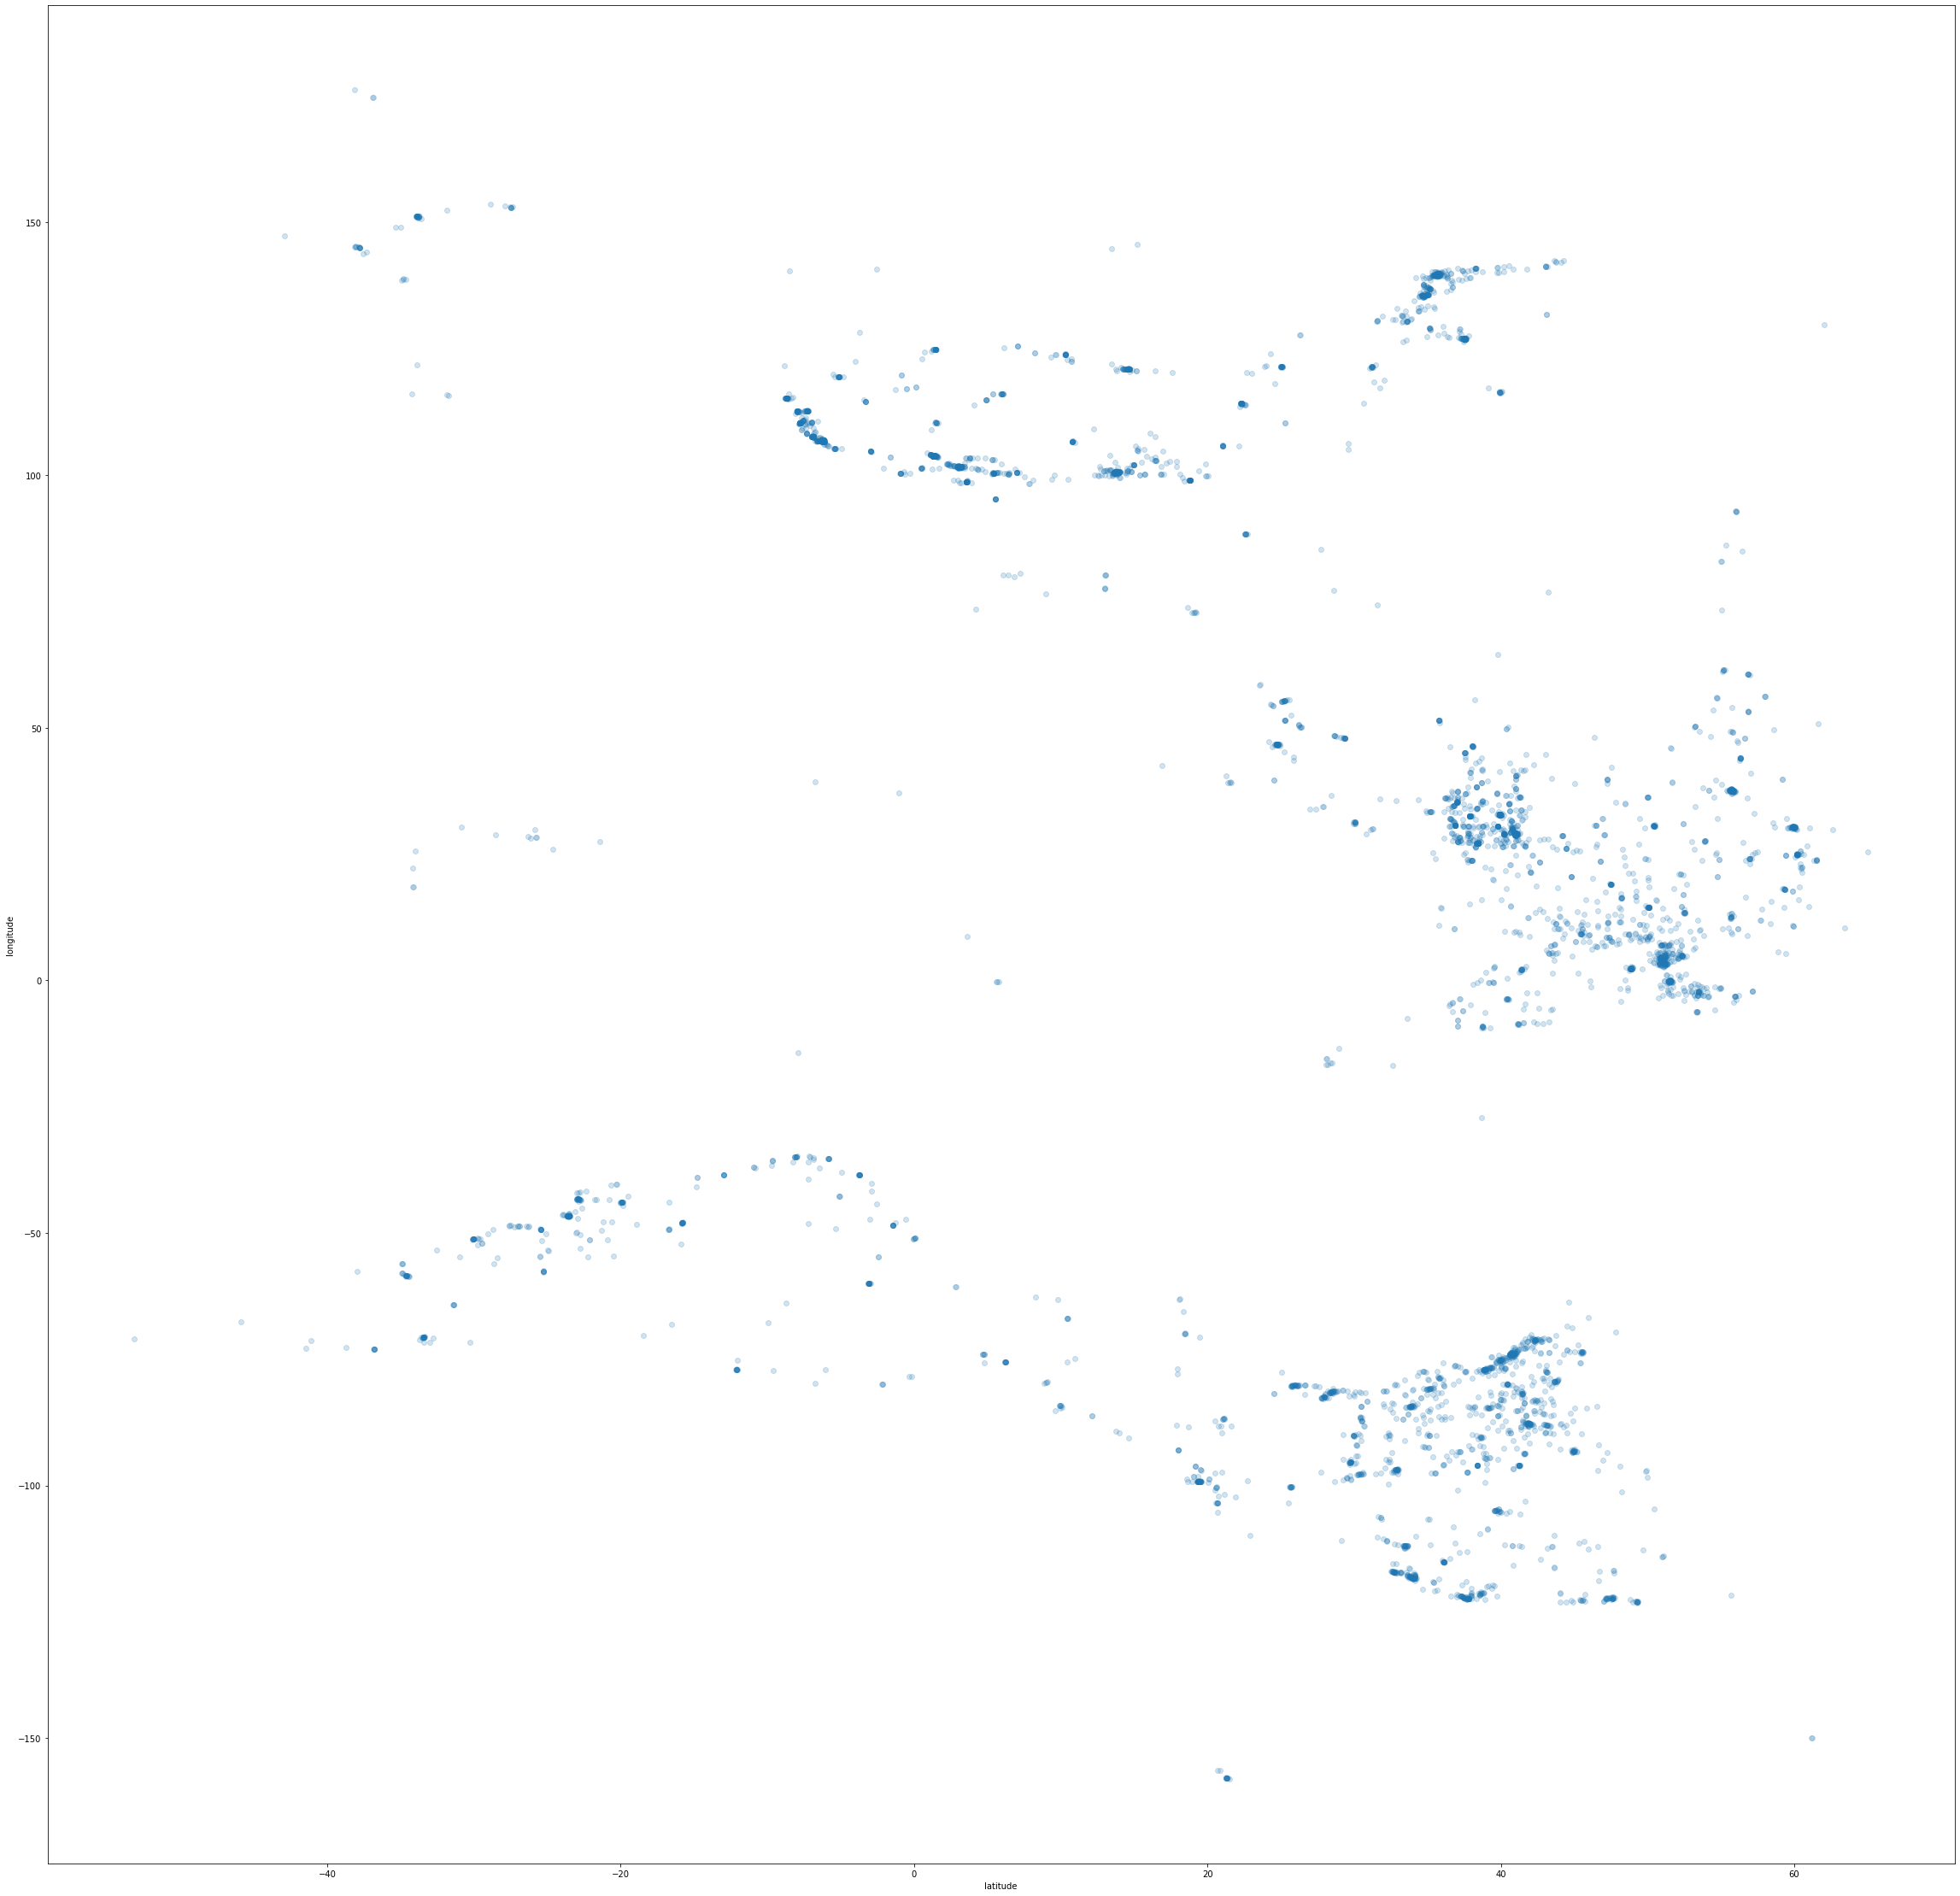

In [17]:
# Visualize
fig, ax = plt.subplots(figsize=(40,40))
ax.scatter(my_df_train["latitude"], my_df_train["longitude"], alpha=0.2)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude');

### Next we normalize the dataframe and find out the elbow point
### This is to get the number k that minimizes SSE

,latitude,longitude
471293,-0.567917,0.969775
178672,1.251867,0.209373
734875,0.325326,1.389481
639723,0.379887,1.443153
399198,0.353116,1.395149


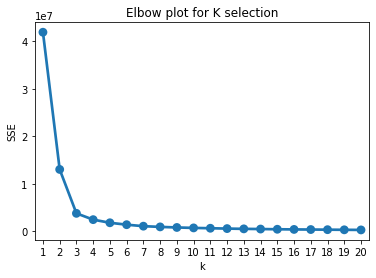

In [18]:
onlylatlong = my_df_train[["latitude", "longitude"]]
def preprocess(df):
    """Preprocess data for KMeans clustering"""
    normalized_df=(df-df.mean())/df.std()
    display(normalized_df.head())
    return normalized_df

#     df_log = np.log1p(df)
#     scaler = StandardScaler()
#     scaler.fit(df_log)
#     df_norm = scaler.transform(df_log)
    
#     return df_norm

def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    sse = {}
    norm = preprocess(df)
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    

elbow_plot(onlylatlong)

However Kmeans is not suitable so we move to meanshift clustering

# Mean Shift Clustering

In [19]:
print(onlylatlong.shape[0])
onlylatlong.head()

5694


,latitude,longitude
471293,13.818435,100.594406
178672,55.755456,37.734256
734875,34.403281,135.290237
639723,35.660626,139.727098
399198,35.043698,135.758755


In [20]:
# find num of clusters in our train set

unique_poi = np.unique(df_train_sample["point_of_interest"])
print(len(unique_poi))

5670


In [27]:
# goal = 100
# i = 1.31
# diff = 0
# prev = 100

# run = True

# while(run):
#     diff = goal-i
#     if(diff<prev and i<= goal):
#         prev = diff
#         i += 1
#     else:
#         break

# print(i)


import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = onlylatlong
bw=0.0001
goal = len(unique_poi)
mydict = {}
print("goal:", goal)

for i in range(5):
    meanshift = MeanShift(bandwidth=bw)
    meanshift.fit(X)
    labels = meanshift.labels_
    labels_unique = np.unique(labels)
    current = len(labels_unique)
    mydict[current] = bw
    bw+=0.0001
    
closest = min(mydict, key=lambda x:abs(x-goal))

print(mydict)
bw = mydict[closest]
print(bw)
  
# plt.show()

goal: 5670
{5683: 0.0001, 5674: 0.0002, 5668: 0.00030000000000000003, 5657: 0.0004, 5650: 0.0005}
0.00030000000000000003


In [28]:
# Fit Mean Shift with Scikit using predicted bandwidth

meanshift = MeanShift(bandwidth=bw)
meanshift.fit(X)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(n_clusters_)


5668
